# CS 611 Assignment 4

(Quiz2 Spring 2019)

April 27, 2021

Celeste Manughian-Peter

In [20]:
library(TSA)
library(forecast)

### Problem 1. (25 points) 
Let 

$Y = e_t − θe_{t−1}$, where $|θ| < 1$. 

Estimate $cov(r_2,r_3)$ assuming that the sample size is large.

(Estimating the covariance between sample autocorrelation values at lag 2 and 3)

 <img src="files/image2.jpeg">

### Problem 2. (10 points) 

Set the seed in R to 1224 and simulate 200 values from an ARIMA(1,3,1) process with φ = 0.6 and θ = − 0.7 , σ e 2 = 10 and μ = 100 .

In [3]:
?arima.sim

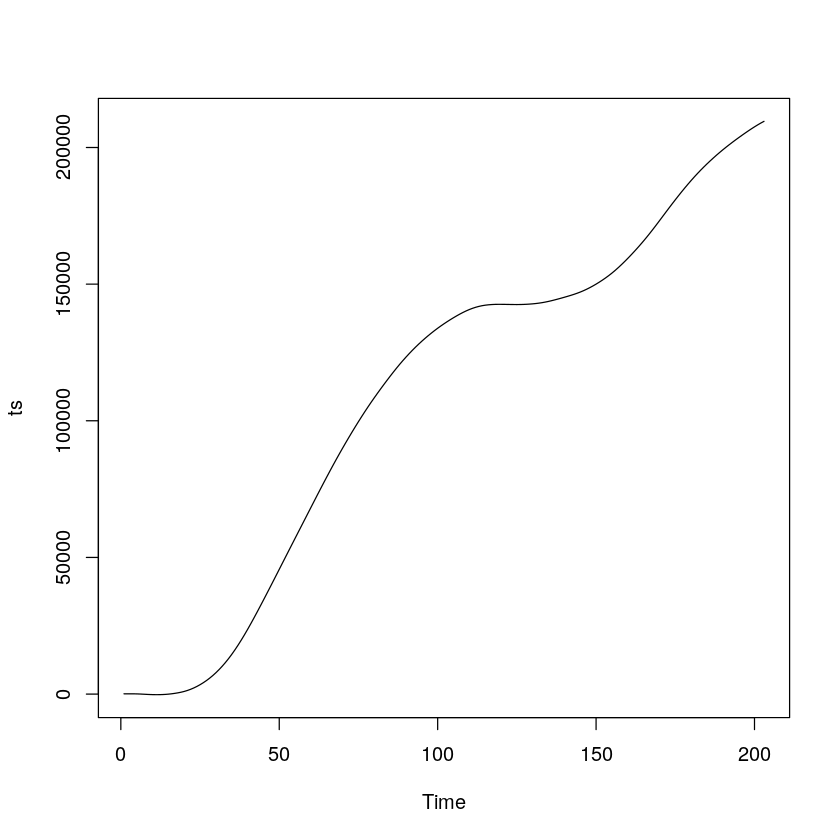

In [93]:
set.seed(1224)
ts = arima.sim(n=200, list(order=c(1,3,1), ar=c(0.6), ma=0.7), sd=sqrt(10))+100
plot(ts)

#### a) Find the appropriate ARIMA model that fits the data.

In [79]:
auto.arima(ts)

Series: ts 
ARIMA(3,2,1) 

Coefficients:
         ar1      ar2      ar3     ma1
      1.4235  -0.3300  -0.1113  0.7669
s.e.  0.1020   0.1857   0.0979  0.0699

sigma^2 estimated as 9.111:  log likelihood=-508.7
AIC=1027.41   AICc=1027.72   BIC=1043.93

Looks like ARIMA(2,2,0) fits our simulated data. 

#### b) Use three different methods to estimate the parameters of the model identified in part a) and compare the results against the true values.

In [64]:
library(foreign)

In [80]:
arima(ts, order=c(1,3,1), method="ML")  


Call:
arima(x = ts, order = c(1, 3, 1), method = "ML")

Coefficients:
         ar1     ma1
      0.5208  0.7116
s.e.  0.0681  0.0602

sigma^2 estimated as 9.148:  log likelihood = -505.96,  aic = 1015.93

In [81]:
arima(ts, order=c(1,3,1), method="CSS")  


Call:
arima(x = ts, order = c(1, 3, 1), method = "CSS")

Coefficients:
         ar1     ma1
      0.5430  0.6824
s.e.  0.0657  0.0606

sigma^2 estimated as 9.259:  part log likelihood = -506.35

In [82]:
arima(ts, order=c(1,3,1), method="CSS-ML")  


Call:
arima(x = ts, order = c(1, 3, 1), method = "CSS-ML")

Coefficients:
         ar1     ma1
      0.5208  0.7116
s.e.  0.0681  0.0602

sigma^2 estimated as 9.148:  log likelihood = -505.96,  aic = 1015.93

As we can see the three paramater estimation methods produce very similar values, at least within the standard error for CSS vs ML and CSS-ML. This is probably partly due to the large sample size weve used. 

The true values were phi=.6 and theta=0.7. The estimates were within the SE for phi for CSS but not for ML or CSS-ML.

#### Problem 3. (40 points) 
The following questions explore properties of parameter estimation methods,

a) Why is the Method of Moments (MOM) not a good tool for parameter estimation for MA
models? Give an example of a MA(2) process that might not be estimable using MOM.

mOm has issues with 
* sampling variations and higher order processes that leads it to not produce real solutions for coefs.
* Also always have to solve nonlinear systems of eqns 



b) Show that the MOM and CSS produce very similar results for AR(1) and AR(2) models.

 <img src="files/image1.jpeg">

c)Find the conditional joint pdf.

d) Write the unconditional joint pdf  needed for ML and unconditional SS
estimation.

 <img src="files/image0.jpeg">

### Problem 4. (25 points) 
We are interested in analyzing the daily closing prices of Apple (AAPL) over the last 6 months. Download the data from Yahoo Finance using the getSymbol() command from the quantmod package.

In [23]:
library(quantmod) # or tidyquant
getSymbols(c("AAPL"),
           from='2020-10-05', 
           to='2021-04-05',
          warnings=FALSE, auto.assign=TRUE)

[1] "AAPL"

#### a) Plot the data and comment.

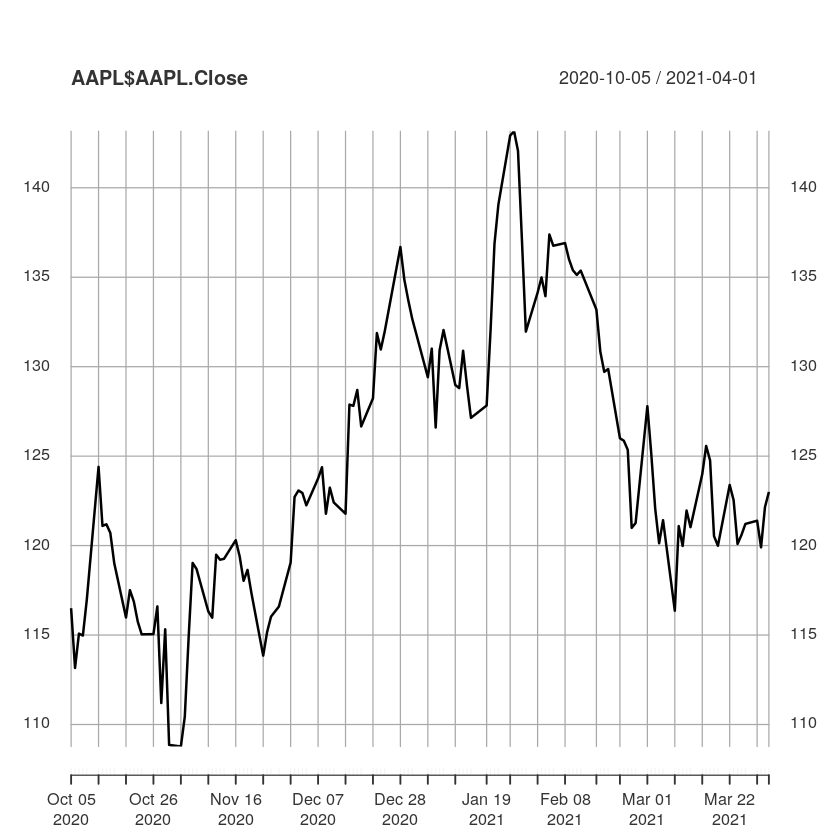

In [27]:
plot(AAPL$AAPL.Close)

Comment: The plot looks very non stationary and like it would require many differences to become stationary due to the sharp increase and high volatility over time. 

#### b) Perform a test for stationarity.

In [52]:
# install.packages('aTSA')
library('aTSA')

In [56]:
# adf.test(ts)
stationary.test(ts)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 25.741   0.990
[2,]   1 -3.088   0.010
[3,]   2  0.463   0.776
[4,]   3  0.721   0.850
[5,]   4  0.955   0.908
Type 2: with drift no trend 
     lag     ADF p.value
[1,]   0  8.8663   0.990
[2,]   1 -3.8471   0.010
[3,]   2 -0.0626   0.950
[4,]   3  0.1121   0.964
[5,]   4  0.3236   0.978
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0  -2.63  0.3123
[2,]   1 -14.60  0.0100
[3,]   2  -3.20  0.0896
[4,]   3  -2.47  0.3763
[5,]   4  -2.01  0.5707
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


If we reject the DF test it means its stationarity. DF test is testing for various violations of stationairty. stationarity with no drift. 
The test will null hypotheses (low p-value associated with the test statistic points to a rejection) in favour of the alternative. Alternative hypothesis is stationarity.
So you have evidence against the null of unit root in favour of the alternative of stationarity. I do not see a problem.

low p value = stationarity. We see at lag 1 the p value is .01, which points to stationarity for all three types tested. 

#### c) Find the best fitting ARIMA model for these data.

In [38]:
model = auto.arima(AAPL$AAPL.Close)
print(model)

Series: AAPL$AAPL.Close 
ARIMA(0,1,0) 

sigma^2 estimated as 6.669:  log likelihood=-291.23
AIC=584.45   AICc=584.49   BIC=587.26


#### d) Estimate the parameters of the best ARIMA model using ML and parametric bootstrapping.

Normally parameter bootstrapping will let us estimate the standard errors of our time series coefficients. We will estimate 200 realizations of the process that auto.arima said was our best fit, ARIMA(0,1,0). Here since the order is 0 for both AR and MA, we dont have any parameters to estimate. We can just put the code for what we would do below:

####  Exercise 7.11

In [ ]:
library(ggplot2)

In [99]:
set.seed(1352); series=arima.sim(n=48,list(ma=0.6))
arima(series,order=c(0,0,1),method='ML')$coef[1]

ma1 
0.5081146

In [105]:
set.seed(1352); thetahat=rep(NA,1000)
for (k in 1:1000) {
    series=arima.sim(n=48,list(ma=0.6));
    thetahat[k]=-arima(series,order=c(0,0,1),method='ML')$coef[1]
}

[1] "Parameter estimate mean:"


[1] -0.6042001

[1] "Parameter estimate SD:"


[1] 0.144248

[1] "Parameter estimate variance:"


[1] 0.02080749

[1] "Parameter estimate median:"


[1] -0.6003047

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



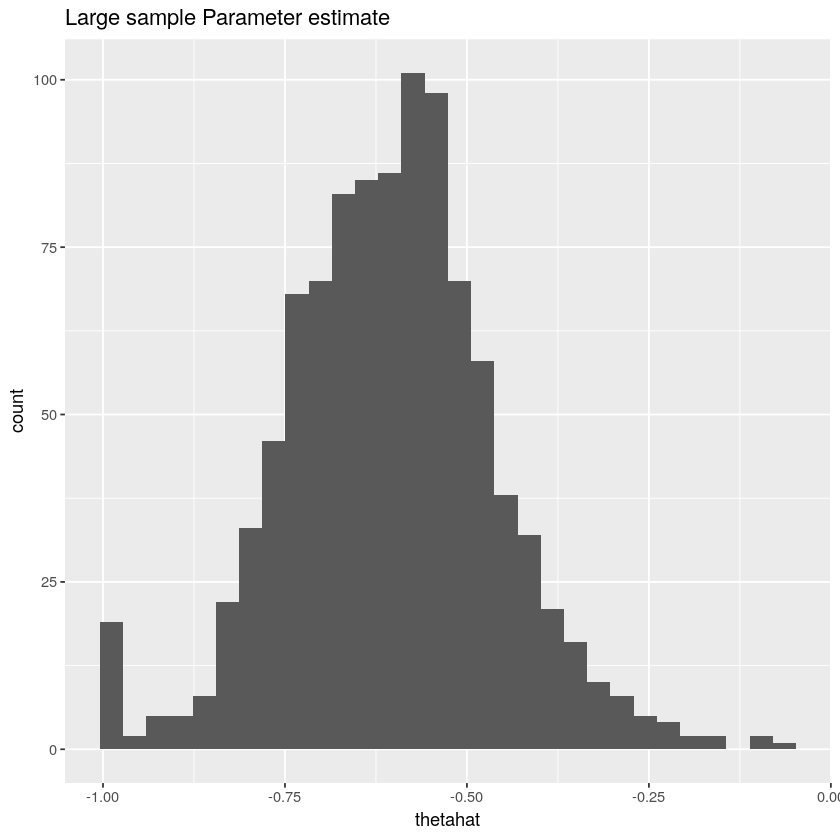

In [119]:
thetahatdf = data.frame(thetahat=thetahat)

print("Parameter estimate mean:")
mean(thetahat) 
print("Parameter estimate SD:")
sd(thetahat)
print("Parameter estimate variance:")
sd(thetahat)^2
print("Parameter estimate median:")
median(thetahat)

ggplot(thetahatdf, aes(x=thetahat)) + geom_histogram() + ggtitle("Large sample Parameter estimate")

The mean of the sampling distribution of the ML parameter estimates of theta is -.604 which is almost unbiased. 

The sample variance is .02.

The large sample result in eqn 7.4.11 shows 

1-theoretical theta^2 / number samples=48



In [122]:
(1-((-.6)^2))/48

[1] 0.01333333

In [75]:
# library(ggplot2)
# iters = 500
# param = rep(NA, iters)
# param2 = rep(NA, iters)

# for (i in 1:iters) {
#     ts = arima.sim(n=100,list(ar=0.1, ma=0.1));
#     param[i] = -arima(ts,
#                       order=c(0,1,0),
#                       method='ML')$coef[1]
#     param2[i] = -arima(ts,
#                       order=c(0,1,0),
#                       method='ML')$coef[2]
# }

# paramdf = data.frame(param=param)

# mean(param) 
# sd(param)
# median(param)

# ggplot(paramdf, aes(x=param)) + geom_histogram()

#### e) Use the Ljung-Box and Box-Pierce tests for independence of the residuals and comment.

LB and BP are tests for lack of corr in residuals

First, we need to grab the residuals from our model.

In [47]:
model = auto.arima(ts)

In [48]:
# names(fit) # THings we can extract , coefs, variance for boostrap
resids = model$residuals

In [49]:
?Box.test

In [44]:
Box.test(resids) # See if they behave as they should 
# no ac within resids, which is evidence of a good fit


	Box-Pierce test

data:  resids
X-squared = 0.02794, df = 1, p-value = 0.8672


In [45]:
Box.test(resids, type="Ljung-Box")


	Box-Ljung test

data:  resids
X-squared = 0.028355, df = 1, p-value = 0.8663


If the p value is greater than 0.05 then the residuals are independent which we want for the model to be correct. Here we see the p value is .86, so the model is a good fit. 

They both agree that the model fits the data well 

### References

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html